In [255]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

sns.set()

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [257]:
df = pd.read_csv("kayak_data.csv", nrows= 1900)

In [258]:
df.head()

,Unnamed: 0,Airline,stops_list,Departure,Prices,Duration
0,0,Emirates,1 stop,LGWGatwick-BLRBengaluru Intl,£687,13h 45m
1,1,Lufthansa,1 stop,BLRBengaluru Intl-LGWGatwick,£629,NaN
2,2,Multiple Airlines,1 stop,LHRHeathrow-BLRBengaluru Intl,£538,NaN
3,3,Lufthansa,1 stop,BLRBengaluru Intl-LHRHeathrow,£629,NaN
4,4,Lufthansa,3 stops,STNStansted-BLRBengaluru Intl,£629,NaN


In [259]:
df['Source'] = df['Departure'].str.split('-').str.get(0).rename({0: 'Source'})

In [260]:
df['Destination'] = df['Departure'].str.split('-').str.get(1).rename({1: 'Destination'})

In [261]:
df.head()

,Unnamed: 0,Airline,stops_list,Departure,Prices,Duration,Source,Destination
0,0,Emirates,1 stop,LGWGatwick-BLRBengaluru Intl,£687,13h 45m,NaN,BLRBengaluru Intl
1,1,Lufthansa,1 stop,BLRBengaluru Intl-LGWGatwick,£629,NaN,BLRBengaluru Intl,NaN
2,2,Multiple Airlines,1 stop,LHRHeathrow-BLRBengaluru Intl,£538,NaN,LHRHeathrow,BLRBengaluru Intl
3,3,Lufthansa,1 stop,BLRBengaluru Intl-LHRHeathrow,£629,NaN,BLRBengaluru Intl,LHRHeathrow
4,4,Lufthansa,3 stops,STNStansted-BLRBengaluru Intl,£629,NaN,STNStansted,BLRBengaluru Intl


In [262]:
df['stops_list'] = df['stops_list'].str.replace('stop', ' ')
# df['stops_list'] = df['stops_list'].str.replace('stops', ' ')

In [263]:
df['stops_list'] = df['stops_list'].str.replace('s', ' ')

In [264]:
df['stops_list']

0        1  
1        1  
2        1  
3        1  
4       3   
        ... 
1895     1  
1896     1  
1897     1  
1898     1  
1899     1  
Name: stops_list, Length: 1900, dtype: object

In [265]:
df['stops_list']= pd.to_numeric(df['stops_list'], errors='coerce')

In [267]:
df.isna().sum().sum()

1931

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1900 non-null   int64 
 1   Airline      952 non-null    object
 2   stops_list   1900 non-null   int64 
 3   Departure    1900 non-null   object
 4   Prices       952 non-null    object
 5   Duration     1867 non-null   object
 6   Source       1899 non-null   object
 7   Destination  1899 non-null   object
dtypes: int64(2), object(6)
memory usage: 118.9+ KB


In [270]:
len(df)

1900

In [271]:
df.describe()

,Unnamed: 0,stops_list
count,1900.000000,1900.000000
mean,16.468421,1.117895
std,9.799278,0.471176
min,0.000000,1.000000
25%,8.000000,1.000000
50%,16.000000,1.000000
75%,25.000000,1.000000
max,33.000000,3.000000


In [272]:
df.columns

Index(['Unnamed: 0', 'Airline', 'stops_list', 'Departure', 'Prices',
       'Duration', 'Source', 'Destination'],
      dtype='object')

In [273]:
df.shape

(1900, 8)

In [274]:
df = df.drop(['Unnamed: 0'], axis=1)

In [275]:
df['Duration']

0       13h 45m
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1895    13h 55m
1896    12h 05m
1897    13h 55m
1898    12h 05m
1899    14h 05m
Name: Duration, Length: 1900, dtype: object

In [276]:
df['Prices'] = df['Prices'].str.replace('£','',regex=True)
df['Prices'] = df['Prices'].str.replace(',','',regex=True)
df['Prices'] = df['Prices'].str.replace('SAR','',regex=True)
df['Prices'] = df['Prices'].str.strip()
df['Prices'] = round(pd.to_numeric(df['Prices'])/3.75,2)

In [277]:
duration_hours = []
duration_mins = []
df['Duration'] = df['Duration'].str.replace('h','',regex=True)
df['Duration'] = df['Duration'].str.replace('m','',regex=True)
# for i in range(df['Duration']) :
#     duration_hours.append(df['Duration'][i].split(sep = "h")[0])
#     duration_mins.append(df['Duration'][i].split(sep = "m")[0].split()[-1])
# d = []
# for i in range(len(df['Duration'])):
#     d.append(duration_hours[i]*60+duration_mins[i])

In [278]:
df['Duration_hour'] = df['Duration'].str.split(' ', expand=True).get(0)

In [279]:
df['Duration_hour']

0        13
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1895     13
1896     12
1897     13
1898     12
1899     14
Name: Duration_hour, Length: 1900, dtype: object

In [280]:
df['Duration_min'] = df['Duration'].str.split(' ', expand=True).get(1)

In [281]:
df['Duration_min']

0        45
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1895     55
1896     05
1897     55
1898     05
1899     05
Name: Duration_min, Length: 1900, dtype: object

In [282]:
df['Duration_min'].head()

0     45
1    NaN
2    NaN
3    NaN
4    NaN
Name: Duration_min, dtype: object

In [283]:
df['Duration']= pd.to_numeric(df['Duration'], errors='coerce')

In [284]:
df['Duration'].dtype

dtype('float64')

In [285]:
df['Duration_min']= pd.to_numeric(df['Duration_min'], errors='coerce')

In [286]:
df['Duration_hour']= pd.to_numeric(df['Duration_hour'], errors='coerce')

In [287]:
# mean_duration_min = df['Duration_min'].mean()
df['Duration_min'].fillna(int(df['Duration_min'].mean()), inplace=True)

In [288]:
df['Duration_min']

0       45.0
1       27.0
2       27.0
3       27.0
4       27.0
        ... 
1895    55.0
1896     5.0
1897    55.0
1898     5.0
1899     5.0
Name: Duration_min, Length: 1900, dtype: float64

In [289]:
# mean_duration_min = df['Duration_min'].mean()
df['Duration_hour'].fillna(int(df['Duration_hour'].mean()), inplace=True)

In [115]:
# df['Duration_hour']
# seconds = 0
# seconds = seconds*(24*3600)
# hour = seconds // 3600

In [290]:
df['Duration_hour'] = df['Duration_hour']*60

In [291]:
df['Duration_hour']

0       780.0
1       780.0
2       780.0
3       780.0
4       780.0
        ...  
1895    780.0
1896    720.0
1897    780.0
1898    720.0
1899    840.0
Name: Duration_hour, Length: 1900, dtype: float64

In [292]:
df['Duration'] = df['Duration_hour'] + df['Duration_min']

In [293]:
df['Duration']

0       825.0
1       807.0
2       807.0
3       807.0
4       807.0
        ...  
1895    835.0
1896    725.0
1897    835.0
1898    725.0
1899    845.0
Name: Duration, Length: 1900, dtype: float64

In [294]:
df = df.drop(['Duration_hour'], axis=1)

In [295]:
df = df.drop(['Duration_min'], axis=1)

In [296]:
df

,Airline,stops_list,Departure,Prices,Duration,Source,Destination
0,Emirates,1,LGWGatwick-BLRBengaluru Intl,183.20,825.0,NaN,BLRBengaluru Intl
1,Lufthansa,1,BLRBengaluru Intl-LGWGatwick,167.73,807.0,BLRBengaluru Intl,NaN
2,Multiple Airlines,1,LHRHeathrow-BLRBengaluru Intl,143.47,807.0,LHRHeathrow,BLRBengaluru Intl
3,Lufthansa,1,BLRBengaluru Intl-LHRHeathrow,167.73,807.0,BLRBengaluru Intl,LHRHeathrow
4,Lufthansa,3,STNStansted-BLRBengaluru Intl,167.73,807.0,STNStansted,BLRBengaluru Intl
...,...,...,...,...,...,...,...
1895,NaN,1,BLRBengaluru Intl-LHRHeathrow,NaN,835.0,BLRBengaluru Intl,LHRHeathrow
1896,NaN,1,LHRHeathrow-BLRBengaluru Intl,NaN,725.0,LHRHeathrow,BLRBengaluru Intl
1897,NaN,1,BLRBengaluru Intl-LHRHeathrow,NaN,835.0,BLRBengaluru Intl,LHRHeathrow
1898,NaN,1,LHRHeathrow-BLRBengaluru Intl,NaN,725.0,LHRHeathrow,BLRBengaluru Intl


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Airline      952 non-null    object 
 1   stops_list   1900 non-null   int64  
 2   Departure    1900 non-null   object 
 3   Prices       952 non-null    float64
 4   Duration     1900 non-null   float64
 5   Source       1899 non-null   object 
 6   Destination  1899 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 104.0+ KB


In [298]:
df['Airline'].isnull().sum()

948

In [299]:
df

,Airline,stops_list,Departure,Prices,Duration,Source,Destination
0,Emirates,1,LGWGatwick-BLRBengaluru Intl,183.20,825.0,NaN,BLRBengaluru Intl
1,Lufthansa,1,BLRBengaluru Intl-LGWGatwick,167.73,807.0,BLRBengaluru Intl,NaN
2,Multiple Airlines,1,LHRHeathrow-BLRBengaluru Intl,143.47,807.0,LHRHeathrow,BLRBengaluru Intl
3,Lufthansa,1,BLRBengaluru Intl-LHRHeathrow,167.73,807.0,BLRBengaluru Intl,LHRHeathrow
4,Lufthansa,3,STNStansted-BLRBengaluru Intl,167.73,807.0,STNStansted,BLRBengaluru Intl
...,...,...,...,...,...,...,...
1895,NaN,1,BLRBengaluru Intl-LHRHeathrow,NaN,835.0,BLRBengaluru Intl,LHRHeathrow
1896,NaN,1,LHRHeathrow-BLRBengaluru Intl,NaN,725.0,LHRHeathrow,BLRBengaluru Intl
1897,NaN,1,BLRBengaluru Intl-LHRHeathrow,NaN,835.0,BLRBengaluru Intl,LHRHeathrow
1898,NaN,1,LHRHeathrow-BLRBengaluru Intl,NaN,725.0,LHRHeathrow,BLRBengaluru Intl


In [219]:

# get price quantile to deal with outliers
# def get_price_quantile(price):
Q1 = df['Prices'].quantile(0.25)
Q3 = df['Prices'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
# get_price_quantile = (lower_lim, upper_lim)
# return (lower_lim,upper_lim)

In [222]:
quantile = upper_lim, lower_lim

In [223]:
upper_lim

178.8

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Airline      952 non-null    object 
 1   stops_list   1900 non-null   int64  
 2   Departure    1900 non-null   object 
 3   Prices       952 non-null    float64
 4   Duration     1900 non-null   float64
 5   Source       1899 non-null   object 
 6   Destination  1899 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 104.0+ KB


In [300]:
df['Prices']= pd.to_numeric(df['Prices'], errors='coerce')

In [301]:
df['Prices']= df['Prices'].fillna(float(df['Prices'].mean()))

In [302]:
df['Prices'].fillna(float(df['Prices'].mean()))
print(df['Prices'])

0       183.200000
1       167.730000
2       143.470000
3       167.730000
4       167.730000
           ...    
1895    169.050525
1896    169.050525
1897    169.050525
1898    169.050525
1899    169.050525
Name: Prices, Length: 1900, dtype: float64


In [228]:

df['Prices'].mean()

169.05052521008196

In [229]:
df['Prices']

0       183.200000
1       167.730000
2       143.470000
3       167.730000
4       167.730000
           ...    
1895    169.050525
1896    169.050525
1897    169.050525
1898    169.050525
1899    169.050525
Name: Prices, Length: 1900, dtype: float64

In [303]:
df.isnull().sum()

Airline        948
stops_list       0
Departure        0
Prices           0
Duration         0
Source           1
Destination      1
dtype: int64

In [558]:
# the Airline column will be replaced by the average price per airline.
# df.drop("Airline", axis = 1, inplace = True)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Airline      952 non-null    object 
 1   stops_list   1900 non-null   int64  
 2   Departure    1900 non-null   object 
 3   Prices       1900 non-null   float64
 4   Duration     1900 non-null   float64
 5   Source       1899 non-null   object 
 6   Destination  1899 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 104.0+ KB


In [304]:
# source
df["Source"].value_counts()

BLRBengaluru Intl    950
LHRHeathrow          787
STNStansted          137
LCYLondon City        25
Name: Source, dtype: int64

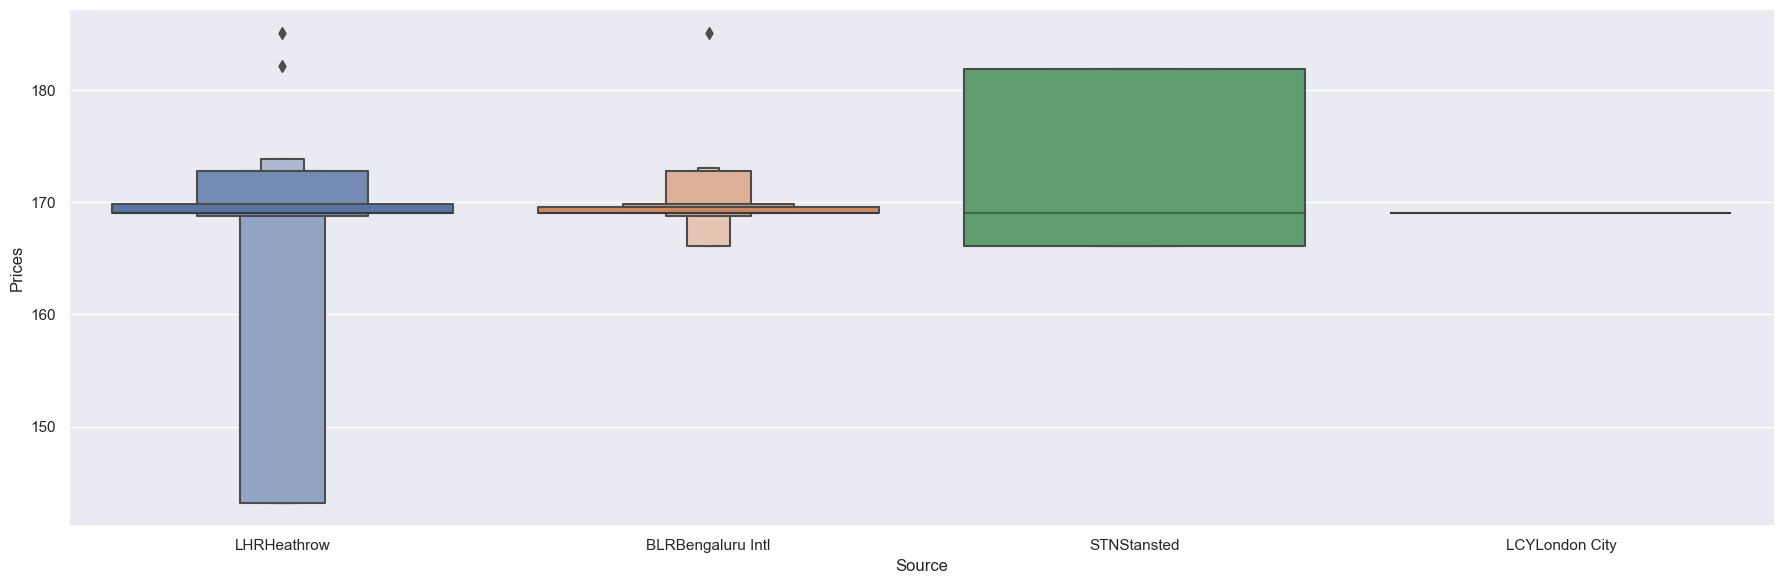

In [305]:
# source vs price
sns.catplot(y = "Prices", x= "Source", data = df.sort_values("Prices", ascending = False), kind="boxen", height = 6, aspect = 3)

In [306]:
# performing OneHotEncoding on Source since it's nominal categorical data  
source =df[["Source"]]
source =pd.get_dummies(source, drop_first=True)
source.head()

,Source_LCYLondon City,Source_LHRHeathrow,Source_STNStansted
0,0,0,0
1,0,0,0
2,0,1,0
3,0,0,0
4,0,0,1


In [307]:
# destination
df["Destination"].value_counts()

BLRBengaluru Intl    950
LHRHeathrow          444
LGWGatwick           423
STNStansted           82
Name: Destination, dtype: int64

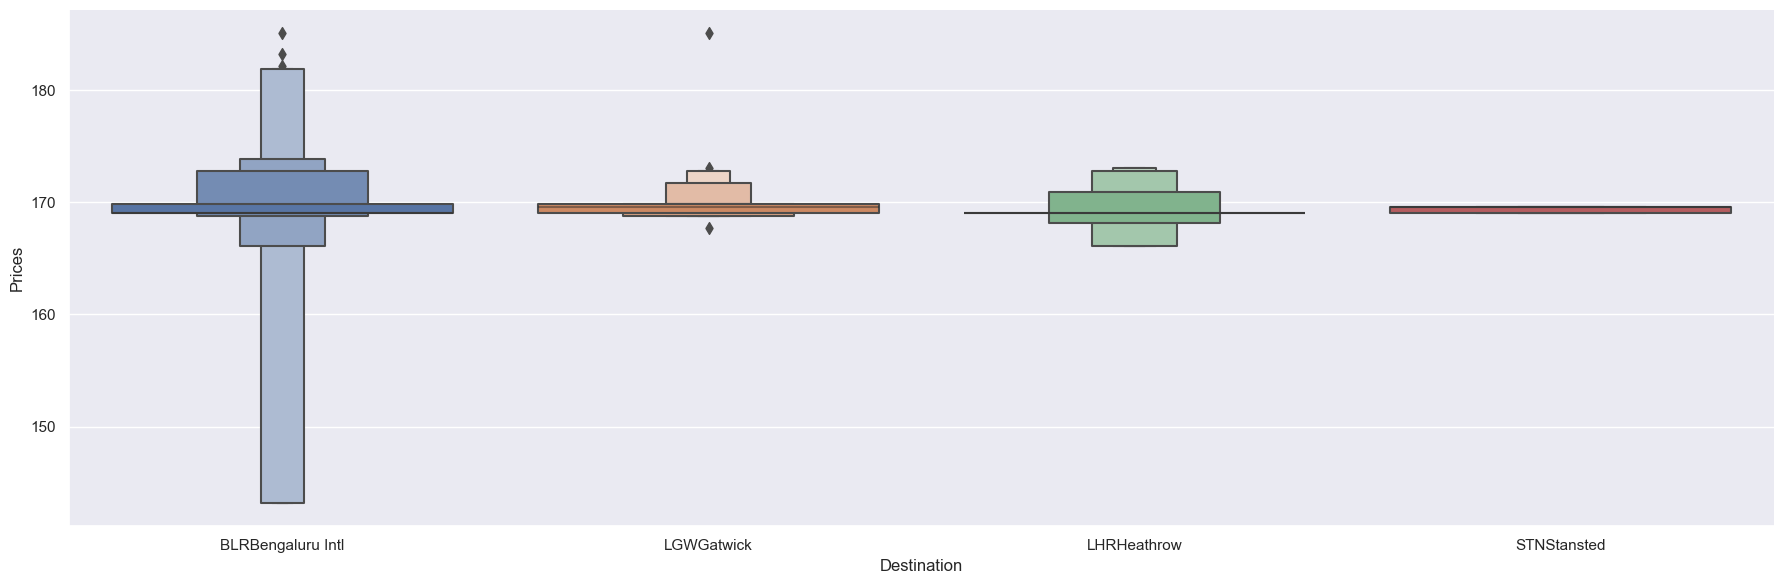

In [308]:
# destination vs price
sns.catplot(y = "Prices", x= "Destination", data = df.sort_values("Prices", ascending = False), kind="boxen", height = 6, aspect = 3)

In [309]:
# performing OneHotEncoding on Destination since it's nominal categorical data
destination = df[["Destination"]]
destination = pd.get_dummies(destination, drop_first=True)
destination.head()

,Destination_LGWGatwick,Destination_LHRHeathrow,Destination_STNStansted
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


In [310]:
# total stops
print(df["stops_list"].value_counts())
df["stops_list"].unique()

1    1788
3     112
Name: stops_list, dtype: int64


array([1, 3])

In [311]:
# performing LabelEncoder on Total stops since it's ordinal categorical data
df.replace({ "1 stop ": 1,  "3 stops ":3}, inplace=True)

In [312]:
final_df = pd.concat([df,source,destination], axis=1).reset_index(drop = True)

In [313]:
final_df.head()

,Airline,stops_list,Departure,Prices,Duration,Source,Destination,Source_LCYLondon City,Source_LHRHeathrow,Source_STNStansted,Destination_LGWGatwick,Destination_LHRHeathrow,Destination_STNStansted
0,Emirates,1,LGWGatwick-BLRBengaluru Intl,183.20,825.0,NaN,BLRBengaluru Intl,0,0,0,0,0,0
1,Lufthansa,1,BLRBengaluru Intl-LGWGatwick,167.73,807.0,BLRBengaluru Intl,NaN,0,0,0,0,0,0
2,Multiple Airlines,1,LHRHeathrow-BLRBengaluru Intl,143.47,807.0,LHRHeathrow,BLRBengaluru Intl,0,1,0,0,0,0
3,Lufthansa,1,BLRBengaluru Intl-LHRHeathrow,167.73,807.0,BLRBengaluru Intl,LHRHeathrow,0,0,0,0,1,0
4,Lufthansa,3,STNStansted-BLRBengaluru Intl,167.73,807.0,STNStansted,BLRBengaluru Intl,0,0,1,0,0,0


In [ ]:
# boxplots for each route
k=0
figure, axis = plt.subplots(4, 3, figsize=(15,15))
for i in range(4):
    for j in range(3):
        axis[i,j].boxplot(df['Prices'])
        axis[i,j].set_title(f"{df['Source'][0]} TO {df['Destination'][0]}")
        k += 1

In [ ]:
# get quantile to deal with outliers
lower = []
upper = []
for d in df:
    x = (df['Prices'])
    lower.append(x[0])
    upper.append(x[1])

In [315]:
# drop outliers
k = 0
for d in df:
    low = df['Prices'] < lower[k]
    up = df['Prices'] > upper[k]
    df['Prices'] = df['Prices'][~(low|up)]
    df.dropna(inplace=True)
    df.reset_index(drop = True,inplace=True)
    k+=1

In [ ]:
# boxplots for each route
k=0
figure, axis = plt.subplots(4, 3, figsize=(15,15))
for i in range(4):
    for j in range(3):
        axis[i,j].boxplot(df['Prices'])
        axis[i,j].set_title(f"{df['Source'][0]} TO {df['Destination'][0]}")
        k += 1

In [244]:
avg_airline_price_1 = df['Airline']
avg_airline_price_1 = df['Prices']
new_df = pd.DataFrame()

for avg in avg_airline_price_1:
    first_3 = np.mean(df[df.Airline == avg].reset_index().head(3).Prices)
    last_3 =  np.mean(df[df.Airline == avg].reset_index().tail(3).Prices)
    new_df = new_df.append(
        pd.DataFrame([[avg, last_3 - first_3]], columns = ['Airline', 'PriceDiff']))

In [108]:
new_df

,Airline,PriceDiff
0,183.200000,NaN
0,167.730000,NaN
0,143.470000,NaN
0,167.730000,NaN
0,167.730000,NaN
...,...,...
0,169.050525,NaN
0,169.050525,NaN
0,169.050525,NaN
0,169.050525,NaN


In [71]:
len(df['Airline'])

1900

In [73]:
new_df

,Airline,PriceDiff
0,183.200000,NaN
0,167.730000,NaN
0,143.470000,NaN
0,167.730000,NaN
0,167.730000,NaN
...,...,...
0,169.050525,NaN
0,169.050525,NaN
0,169.050525,NaN
0,169.050525,NaN


In [75]:
# drop date since it'll not be used as a feature
final_df.drop(["Source","Destination"], axis=1, inplace=True)

In [ ]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [76]:
final_df.shape

(1900, 11)

In [81]:
final_df.isnull().sum()

Airline                    948
stops_list                   0
Departure                    0
Prices                       0
Duration                     0
Source_LCYLondon City        0
Source_LHRHeathrow           0
Source_STNStansted           0
Destination_LGWGatwick       0
Destination_LHRHeathrow      0
Destination_STNStansted      0
dtype: int64

In [93]:
# final_df = final_df.drop(['Airline'], axis=1)

In [106]:
new_df['Airline']

0    183.200000
0    167.730000
0    143.470000
0    167.730000
0    167.730000
        ...    
0    169.050525
0    169.050525
0    169.050525
0    169.050525
0    169.050525
Name: Airline, Length: 1900, dtype: float64

In [110]:
final_df = pd.concat([final_df, new_df], ignore_index = True)

In [117]:
final_df.head()

,stops_list,Departure,Prices,Duration,Source_LCYLondon City,Source_LHRHeathrow,Source_STNStansted,Destination_LGWGatwick,Destination_LHRHeathrow,Destination_STNStansted,Airline,PriceDiff
0,1.0,LGWGatwick-BLRBengaluru Intl,183.20,825.0,0.0,0.0,0.0,0.0,0.0,0.0,169.050525,NaN
1,1.0,BLRBengaluru Intl-LGWGatwick,167.73,807.0,0.0,0.0,0.0,0.0,0.0,0.0,169.050525,NaN
2,1.0,LHRHeathrow-BLRBengaluru Intl,143.47,807.0,0.0,1.0,0.0,0.0,0.0,0.0,169.050525,NaN
3,1.0,BLRBengaluru Intl-LHRHeathrow,167.73,807.0,0.0,0.0,0.0,0.0,1.0,0.0,169.050525,NaN
4,3.0,STNStansted-BLRBengaluru Intl,167.73,807.0,0.0,0.0,1.0,0.0,0.0,0.0,169.050525,NaN


In [173]:
final_df['Airline'].fillna(float(final_df['Airline'].mean()))


0       169.050525
1       169.050525
2       169.050525
3       169.050525
4       169.050525
           ...    
1895    169.050525
1896    169.050525
1897    169.050525
1898    169.050525
1899    169.050525
Name: Airline, Length: 1900, dtype: float64

In [118]:
final_df.drop(["PriceDiff"], axis=1, inplace=True)

In [121]:
final_df.drop(["Departure"], axis=1, inplace=True)

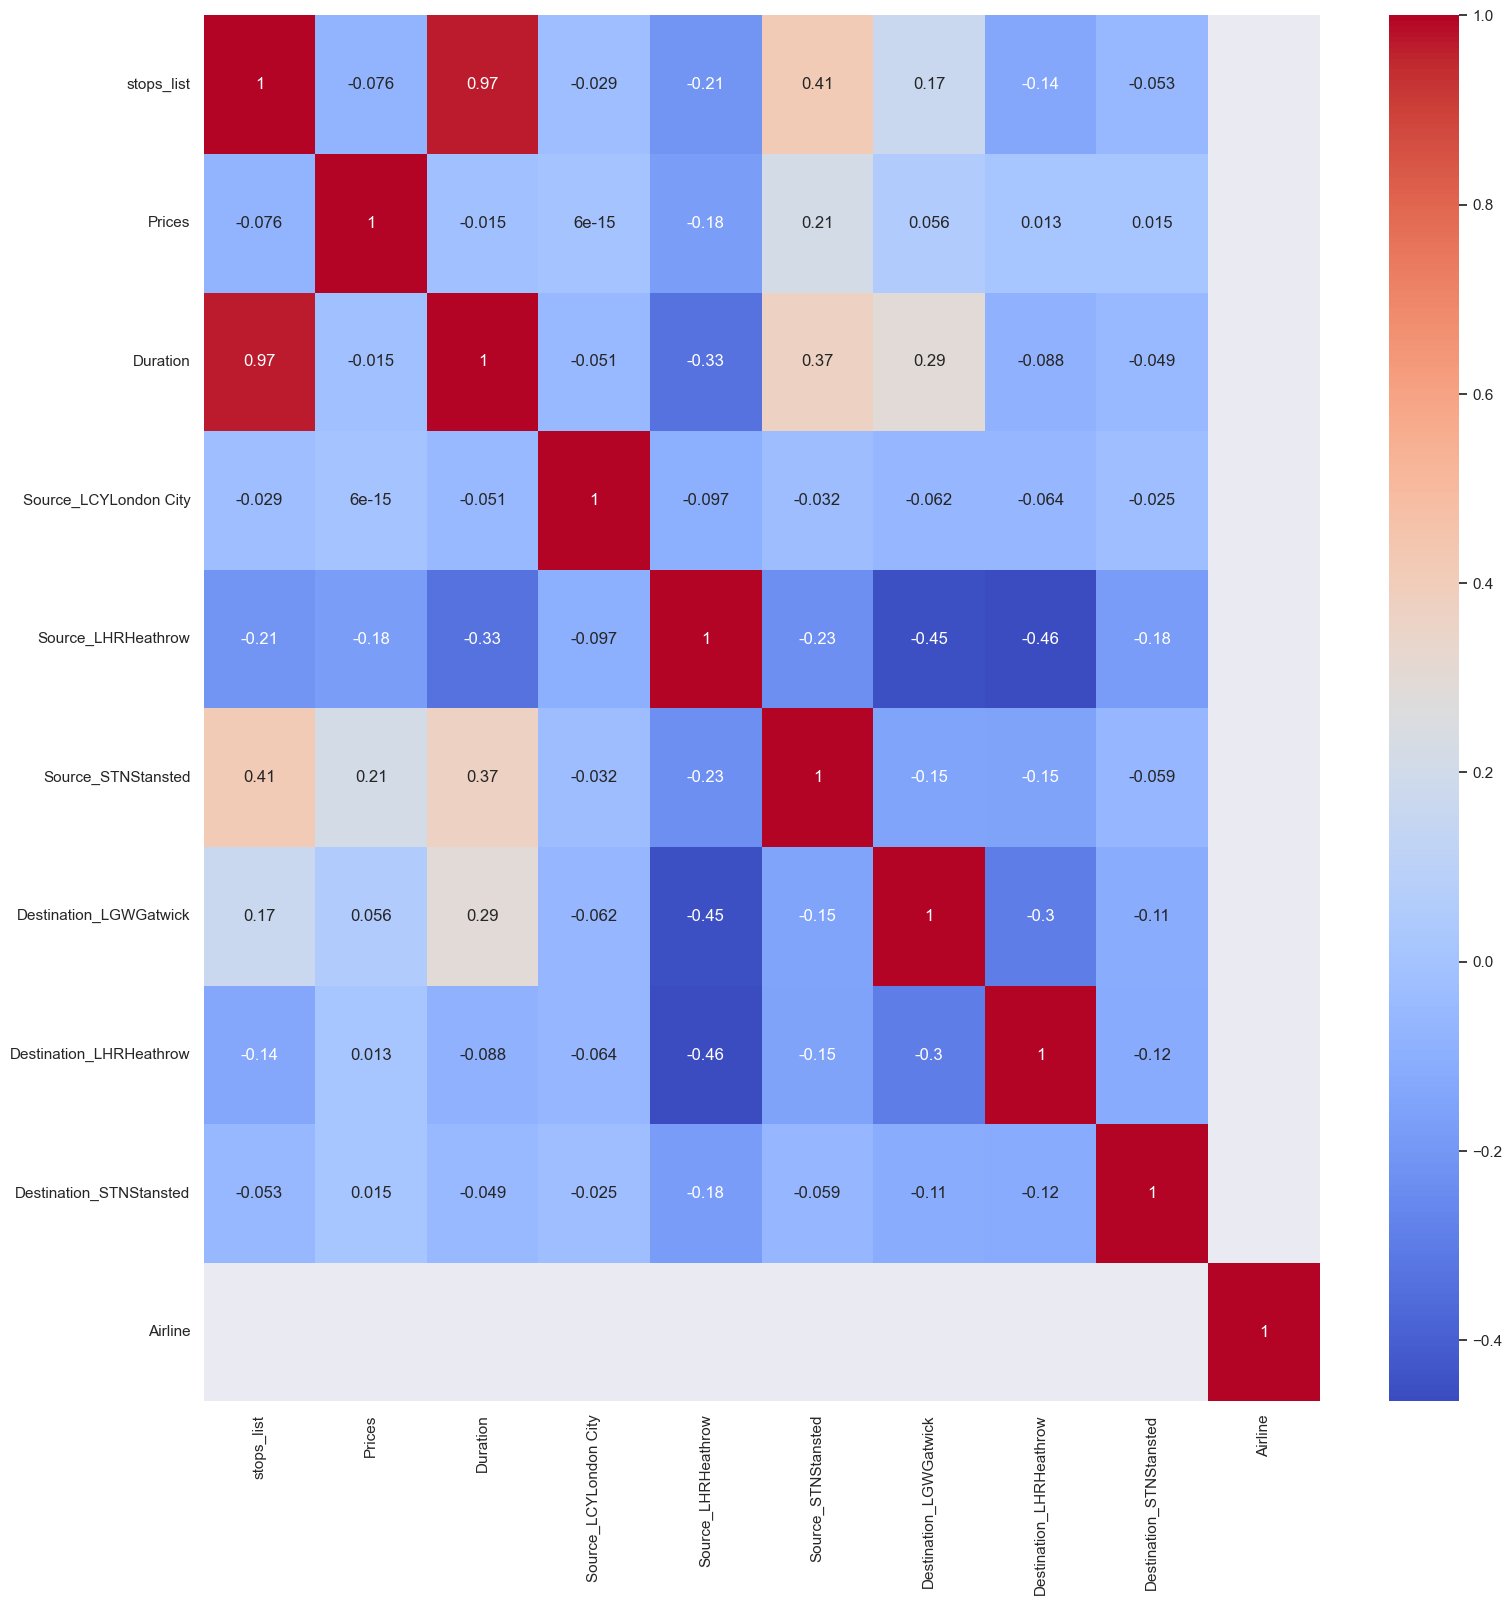

In [122]:
plt.figure(figsize = (18,18))

sns.heatmap(final_df.corr(),annot= True, cmap = "coolwarm")

plt.show()

In [136]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stops_list               1900 non-null   float64
 1   Prices                   1900 non-null   float64
 2   Duration                 1900 non-null   float64
 3   Source_LCYLondon City    1900 non-null   float64
 4   Source_LHRHeathrow       1900 non-null   float64
 5   Source_STNStansted       1900 non-null   float64
 6   Destination_LGWGatwick   1900 non-null   float64
 7   Destination_LHRHeathrow  1900 non-null   float64
 8   Destination_STNStansted  1900 non-null   float64
 9   Airline                  3800 non-null   float64
dtypes: float64(10)
memory usage: 297.0 KB


In [141]:
final_df = final_df.iloc[:1900]

In [142]:
final_df['Prices'].isnull().sum()

0

In [143]:
X = final_df[['stops_list', 'Prices', 'Duration',
       'Source_LCYLondon City', 'Source_LHRHeathrow', 'Source_STNStansted', 'Destination_LGWGatwick',
       'Destination_LHRHeathrow', 'Destination_STNStansted','Airline' ]]

y = final_df["Prices"]

In [144]:
# getting feature importance to the target variable "Price".
selection =ExtraTreesRegressor()
selection.fit(X,y)
selection.feature_importances_

array([2.67354220e-03, 9.70346975e-01, 2.27751362e-03, 8.43620657e-14,
       3.90575319e-03, 2.05680144e-02, 1.95038115e-05, 1.95158763e-04,
       1.35388107e-05, 0.00000000e+00])

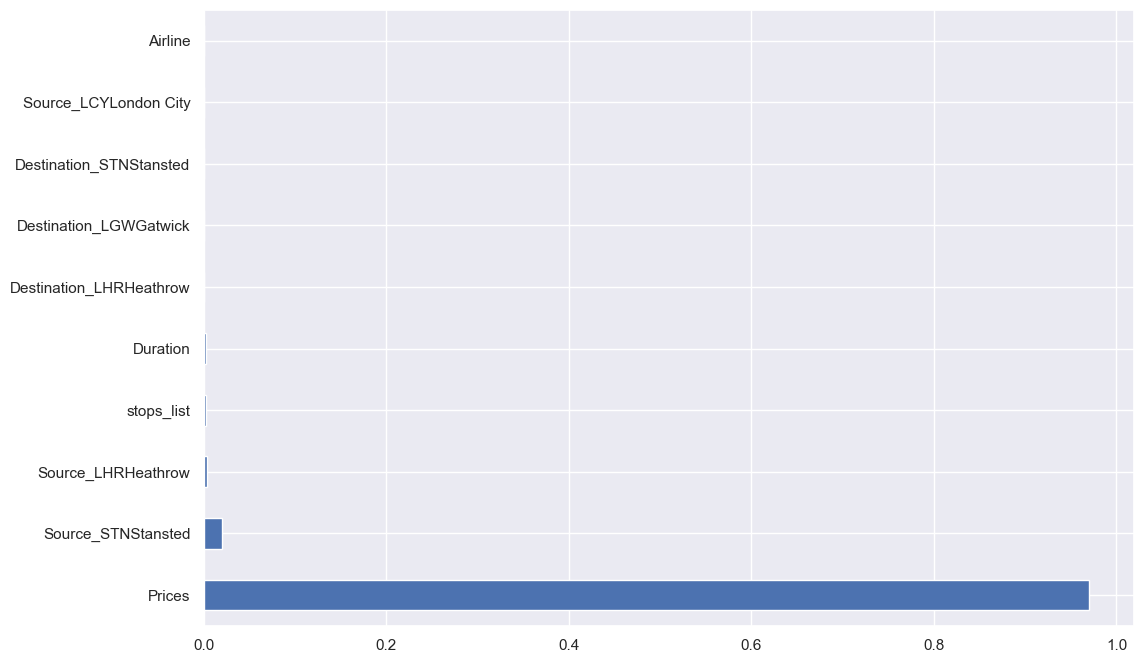

In [145]:
# plotting graph of important features
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

# Modeling:
# Splitting the data

In [146]:
# 60% Train - 20% Val - 20% Test

X_train_or, X_test, y_train_or, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_or, y_train_or, test_size=0.25)

# Defining a function to get metrics for val set

In [147]:
def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {model.score(X_val, y_val)}')
    print("MAE:" , metrics.mean_absolute_error(y_val,model.predict(X_val)))
    print("MSE:" , metrics.mean_squared_error(y_val,model.predict(X_val)))
    print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,model.predict(X_val))))

# Baseline Linear Regression

In [148]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)
get_metrics(lr)

Train score 1.0
Val score 1.0
MAE: 1.9296844823800616e-14
MSE: 2.533920873157918e-27
RMSE: 5.033806584641406e-14


In [149]:
for degree in [1,2,3,4,5]:
    poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly.fit(X_train, y_train)
    print("-"*20)
    print("Degree", degree)
    get_metrics(poly)

--------------------
Degree 1
Train score 1.0
Val score 1.0
MAE: 3.305893570589098e-14
MSE: 4.417355347669592e-27
RMSE: 6.646318791383387e-14
--------------------
Degree 2
Train score 1.0
Val score 0.9999999993114025
MAE: 9.699206255818712e-06
MSE: 1.7874172943894212e-08
RMSE: 0.00013369432652096428
--------------------
Degree 3
Train score 1.0
Val score 0.9999999825603464
MAE: 4.881152600763459e-05
MSE: 4.526873496958786e-07
RMSE: 0.0006728204438747968
--------------------
Degree 4
Train score 1.0
Val score 0.9999999799439396
MAE: 5.236950450661257e-05
MSE: 5.206023583000645e-07
RMSE: 0.0007215277945443713
--------------------
Degree 5
Train score 0.999999999999999
Val score 0.9811307448266002
MAE: 0.05088100839657459
MSE: 0.4897960308819064
RMSE: 0.6998542926080445


In [150]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
get_metrics(lasso_model)

Train score 0.9988864191259141
Val score 0.9988859153843181
MAE: 0.059403275300740695
MSE: 0.028918694342361193
RMSE: 0.17005497447108447


In [151]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
get_metrics(ridge_model)

Train score 0.9999999989489887
Val score 0.9999999983496951
MAE: 9.697527211778535e-05
MSE: 4.283755679107155e-08
RMSE: 0.0002069723575530596


# ElasticNet

In [152]:
EN_model = ElasticNet(alpha=1)
EN_model.fit(X_train, y_train)
EN_model.score(X_val, y_val)
get_metrics(EN_model)

Train score 0.9989226699405284
Val score 0.9989221825974209
MAE: 0.05842838716671836
MSE: 0.027977293271379346
RMSE: 0.16726414221637387


In [153]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
get_metrics(rf)

Train score 0.9999806891246118
Val score 0.9995795128142356
MAE: 0.011263157894979926
MSE: 0.01091473684209865
RMSE: 0.10447361792385028


In [154]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

In [172]:
# function to get metrics for scaled features
def scaled_metrics(model):
    print(f'Train score {model.score(X_train_scaled, y_train)}')
    print(f'Val score {model.score(X_val_scaled, y_val)}')
    print("MAE:" , metrics.mean_absolute_error(y_val,model.predict(X_val_scaled)))
    print("MSE:" , metrics.mean_squared_error(y_val,model.predict(X_val_scaled)))
    print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,model.predict(X_val_scaled))))

    
## Baseline: Linear Regression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
score = lr.score(X_val_scaled, y_val)
print("LR")
scaled_metrics(lr)
print("-"*50)

## Polynomial

for degree in [1,2,3,4,5]:
    poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly.fit(X_train, y_train)
    print("Polynomial - Degree", degree)
    scaled_metrics(poly)
    print("-"*50)
## Lasso

lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
print("Lasso")
scaled_metrics(lasso_model)
print("-"*50)

## Ridge

ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
print("Ridge")
scaled_metrics(ridge_model)
print("-"*50)

## ElasticNet

EN_model = ElasticNet(alpha=1)
EN_model.fit(X_train_scaled, y_train)
EN_model.score(X_val_scaled, y_val)
print("ElasticNet")
scaled_metrics(EN_model)
print("-"*50)

## Random Forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print("Random Forest")
scaled_metrics(rf)

LR
Train score 1.0
Val score 1.0
MAE: 3.477919706615227e-14
MSE: 2.5062858300781754e-27
RMSE: 5.0062818838716776e-14
--------------------------------------------------
Polynomial - Degree 1
Train score -8.092422091385885
Val score -9.285527134752519
MAE: 16.102668307649658
MSE: 266.9851204954711
RMSE: 16.33967932658016
--------------------------------------------------
Polynomial - Degree 2
Train score -178.65313900301473
Val score -205.63733899876635
MAE: 73.06026618541162
MSE: 5363.759594298769
RMSE: 73.23769244247643
--------------------------------------------------


/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: 

Polynomial - Degree 3
Train score -953.7347674792296
Val score -1099.6369090833434
MAE: 168.94872013520268
MSE: 28569.627394255065
RMSE: 169.02552290779954
--------------------------------------------------


/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: 

Polynomial - Degree 4
Train score -953.6693638050127
Val score -1099.5614515898742
MAE: 168.9429233735227
MSE: 28567.668717006713
RMSE: 169.01972878041994
--------------------------------------------------


/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: 

Polynomial - Degree 5
Train score -6961.6601578940945
Val score -8033.140084353563
MAE: 456.6389177341283
MSE: 208545.05854650508
RMSE: 456.66733904069065
--------------------------------------------------
Lasso
Train score 0.9666296407857894
Val score 0.9666145453056126
MAE: 0.3251845851580492
MSE: 0.8665982333818005
RMSE: 0.9309125809558062
--------------------------------------------------
Ridge
Train score 0.9999990298971058
Val score 0.9999983356340056
MAE: 0.0030044261784746298
MSE: 4.320254564811546e-05
RMSE: 0.006572864341222589
--------------------------------------------------


/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: 

ElasticNet
Train score 0.8446045443693018
Val score 0.8445362835055202
MAE: 0.7017770601122834
MSE: 4.035427502856045
RMSE: 2.008837351020745
--------------------------------------------------
Random Forest
Train score -22.311637674290218
Val score -25.542441477349254
MAE: 25.74906451791246
MSE: 688.9716825626351
RMSE: 26.24827008704831


/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/prabhuswamikallur/miniforge3/envs/data_science/lib/python3.10/site-packages/sklearn/b

Feature scaling was of no use, it did not improve anything.

From the above analysis, we can see that the random forest model performed the best with:

Train score 0.9648778537711422
Val score 0.9448134490695079
MAE: 61.717733027545194
MSE: 40035.31608101726
RMSE: 200.0882707232417

So, we'll select it as our model.

In [156]:
# retraining the random forest model on train + val, and scoring on test

X_train_val = pd.concat([X_train,X_val])
y_train_val = pd.concat([y_train,y_val])

rf = RandomForestRegressor()
rf.fit(X_train_val,y_train_val)

print(f'Train score {rf.score(X_train_val, y_train_val)}')
print(f'Test score {rf.score(X_test, y_test)}')
print("MAE:" , metrics.mean_absolute_error(y_test,rf.predict(X_test)))
print("MSE:" , metrics.mean_squared_error(y_test,rf.predict(X_test)))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,rf.predict(X_test))))

Train score 0.999978272725476
Test score 0.9999980767254243
MAE: 0.00036605263183425425
MSE: 3.7661184210379376e-05
RMSE: 0.0061368708810255555


In [157]:
y_train_val_pred = rf.predict(X_train_val)
y_test_pred = rf.predict(X_test)

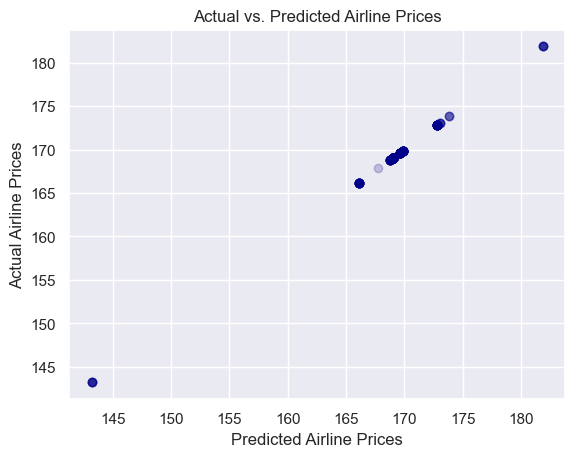

In [158]:
plt.scatter(y_test,y_test_pred,alpha =0.2,color="DarkBlue")
plt.title('Actual vs. Predicted Airline Prices')
plt.xlabel('Predicted Airline Prices')
plt.ylabel('Actual Airline Prices');

# Hyperparameter Tuning

In [159]:
# randomized search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [160]:
# create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [161]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, n_jobs = 1)

In [ ]:
rf_random.fit(X_train_val,y_train_val)

In [163]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [164]:
prediction = rf_random.predict(X_test)

Text(0, 0.5, 'Actual Airline Prices')

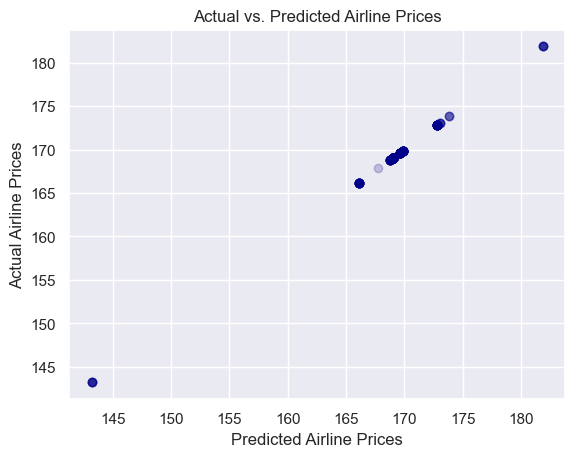

In [165]:
plt.scatter(y_test,prediction,alpha =0.2,color="DarkBlue")
plt.title('Actual vs. Predicted Airline Prices')
plt.xlabel('Predicted Airline Prices')
plt.ylabel('Actual Airline Prices')

In [166]:
print("MAE:" , metrics.mean_absolute_error(y_test,prediction))
print("MSE:" , metrics.mean_squared_error(y_test,prediction))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 0.00031485646264271556
MSE: 2.8697199870622677e-05
RMSE: 0.005356976747254246


# Hyperparameter tuning did not improve the model

In [167]:
test_df = pd.DataFrame({
    "Predicted Price" : rf.predict(X_test),
    "Actual Price" : y_test,
}).reset_index(drop = True)

test_df

,Predicted Price,Actual Price
0,169.050525,169.050525
1,169.870000,169.870000
2,169.600000,169.600000
3,169.870000,169.870000
4,169.600000,169.600000
...,...,...
375,169.050525,169.050525
376,169.870000,169.870000
377,169.870000,169.870000
378,169.600000,169.600000


In [168]:
# save the model
file = open('rf_flight_prediction.pkl', 'wb')
pkl.dump(rf, file)

In [169]:
# open the model
model = open('rf_flight_prediction.pkl','rb')
rf_flight_prediction = pkl.load(model)

In [170]:
print(f'R2 score {metrics.r2_score(y_test,rf_flight_prediction.predict(X_test))}')
print("MAE:" , metrics.mean_absolute_error(y_test,rf_flight_prediction.predict(X_test)))
print("MSE:" , metrics.mean_squared_error(y_test,rf_flight_prediction.predict(X_test)))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,rf_flight_prediction.predict(X_test))))

R2 score 0.9999980767254243
MAE: 0.00036605263183425425
MSE: 3.7661184210379376e-05
RMSE: 0.0061368708810255555
